In [7]:
#!pip install kaggle


# Dataset Information

UTKFace dataset is a large-scale face dataset with long age span (range from 0 to 116 years old). The dataset consists of over 20,000 face images with annotations of age, gender, and ethnicity. The images cover large variation in pose, facial expression, illumination, occlusion, resolution, etc. This dataset could be used on a variety of tasks, e.g., face detection, age estimation, age progression/regression, landmark localization, etc.


The objective of the project is to detect gender and age using facial images. Convolutional Neural Network is used to classify the images. There are 2 output types namely, gender(M or F) and age.

Source: kaggle
Link To DataSet: https://www.kaggle.com/datasets/jangedoo/utkface-new

In [8]:
#!pip install ipywidgets

In [9]:
import pandas as pd  # Import pandas for data manipulation and analysis
import numpy as np  # Import numpy for numerical operations and working with arrays
import os  # Import os module to interact with the operating system (e.g., for file handling)
import matplotlib.pyplot as plt  # Import matplotlib for data visualization (creating plots)
import seaborn as sns  # Import seaborn for advanced data visualization and styling
import warnings  # Import warnings module to handle warning messages
from tqdm.notebook import tqdm  # Import tqdm to show progress bars for loops or long-running processes in Jupyter/Colab notebooks

# Ignore all warning messages to keep the output clean
warnings.filterwarnings('ignore')

# Configure matplotlib to show plots inline within the notebook
%matplotlib inline

# Import TensorFlow, a deep learning framework
import tensorflow as tf

# Import function to load images from Keras preprocessing utilities
from keras.preprocessing.image import load_img

# Import the Sequential class, which allows building a model layer by layer in Keras
from keras.models import Sequential, Model

# Import various layers used in deep learning models
from keras.layers import (
    Dense,  # Fully connected (dense) layer, useful for classification/regression tasks
    Conv2D,  # Convolutional layer, typically used in image processing
    Dropout,  # Dropout layer to prevent overfitting by randomly setting a fraction of inputs to 0 during training
    Flatten,  # Flattens multi-dimensional input (e.g., from Conv2D) into a single vector for the fully connected layers
    MaxPooling2D,  # Max pooling layer to reduce the spatial dimensions (height, width) of the input
    Input  # Input layer to define the input shape of the model
)


1. pandas and numpy: These are essential libraries for data manipulation (pandas) and numerical computations (numpy), often used together in machine learning projects.

2. os: The os module is used for interacting with the file system, such as listing files in directories, checking file paths, etc.

3. matplotlib and seaborn: These are visualization libraries. matplotlib is a foundational library for plotting, while seaborn builds on top of it to create aesthetically pleasing plots easily.

4. warnings: Used to control the visibility of warning messages, often helpful in large projects to keep output clean.

5. tqdm: A library to create progress bars, especially useful when processing large datasets or running time-consuming loops.

6. %matplotlib inline: A magic command in Jupyter notebooks to display plots directly inside the notebook (instead of in a separate window).

7. tensorflow and keras: TensorFlow is a popular deep learning library, and keras is a high-level API for building and training neural networks. They are used together for tasks such as image classification, natural language processing, etc.

8. keras.layers:
- Conv2D is used for creating convolutional layers in neural networks (common in image processing).
- Dense creates fully connected layers.
- Dropout is used to reduce overfitting by randomly turning off some neurons during training.
- Flatten is needed to convert the output of convolutional layers into a format that the dense layers can process.
- MaxPooling2D reduces the spatial size of feature maps, allowing the network to learn more abstract representations.
- Input is a way to specify the input shape when building models

In [10]:
# Unzipping the file in Google Colab
!unzip /content/archive.zip -d /content/unzipped/


Streaming output truncated to the last 5000 lines.
  inflating: /content/unzipped/utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: /content/unzipped/utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: /content/unzipped/utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: /content/unzipped/utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: /content/unzipped/utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: /content/unzipped/utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: /content/unzipped/utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: /content/unzipped/utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: /content/unzipped/utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.j

# LOAD THE DATASET

In [11]:
# Creating basic directory to store the data

# Set the base directory to the correct path
BASE_DIR = '/content/unzipped/UTKFace/'  # Adjust this based on the actual structure

# Check if the directory exists
if not os.path.exists(BASE_DIR):
    print("Directory does not exist. Check the path.")
else:
    print("Using directory:", BASE_DIR)

# Use the directory where you have stored the dataset
print(BASE_DIR)

Using directory: /content/unzipped/UTKFace/
/content/unzipped/UTKFace/


In [12]:
# labels - age, gender, ethnicity
image_paths = []  # Initialize an empty list to store the file paths of the images
age_labels = []  # Initialize an empty list to store the age labels extracted from filenames
gender_labels = []  # Initialize an empty list to store the gender labels extracted from filenames

# Loop through each file in the directory (BASE_DIR), and tqdm adds a progress bar to track the loop's progress
for filename in tqdm(os.listdir(BASE_DIR)):

    # Combine the base directory path with the filename to get the full file path
    # combining the directory and filename
    image_path = os.path.join(BASE_DIR, filename)

    # creating a temporary variable or list, here i am spliting the filename into multiple paths
    # Split the filename by underscores ('_') into multiple parts, e.g., '25_1_image.jpg' -> ['25', '1', 'image.jpg']
    temp = filename.split('_')

    # Convert the first part of the split filename (age) from string to an integer, e.g., '25' -> 25
    age = int(temp[0])

    # Convert the second part of the split filename (gender) from string to an integer, e.g., '1' -> 1 (assuming 1 is male, 0 is female)
    gender = int(temp[1])

    # Append the full image path to the image_paths list
    image_paths.append(image_path)

    # Append the extracted age to the age_labels list
    age_labels.append(age)

    # Append the extracted gender to the gender_labels list
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

- Here we use the BASE_DIR to iterate the image paths

- Age and gender labels are assigned to the corresponding image path

- With the split function, we can extract the age and gender from the image path

- The first index is the age and the second index is the gender

In [13]:
# converting the dataframe

# Create an empty pandas DataFrame to store the data
df = pd.DataFrame()

# Assign the 'image_paths', 'age_labels', and 'gender_labels' lists as columns to the DataFrame
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels


#df['image'] = image_paths  # Create a new column 'image' and assign the list of image paths to it
#df['age'] = age_labels  # Create a new column 'age' and assign the list of age labels to it
#df['gender'] = gender_labels  # Create a new column 'gender' and assign the list of gender labels to it

# Display the first 5 rows of the DataFrame to inspect the data
df.head()

image  age  gender
0  /content/unzipped/UTKFace/40_1_0_2017011718141...   40       1
1  /content/unzipped/UTKFace/23_1_2_2017011617301...   23       1
2  /content/unzipped/UTKFace/19_1_1_2017011712402...   19       1
3  /content/unzipped/UTKFace/26_1_0_2017011622080...   26       1
4  /content/unzipped/UTKFace/54_0_0_2017011321031...   54       0

From the display we can see better how the age and gender were extracted

In gender zero (0) is Male and one (1) is female.

 mapping the gender label for a better display in the graphs
 =============================================================

 gender_dict = {0: 'Male', 1: 'Female'}: This creates a Python dictionary where the key 0 represents 'Male' and the key 1 represents 'Female'.
Key 0 corresponds to 'Male'.
Key 1 corresponds to 'Female'.
This dictionary can be used to map numerical gender labels (e.g., 0 and 1) to their human-readable string equivalents ('Male' and 'Female').

In [14]:
# map labels for gender

gender_dict = {0:'Male', 1:'Female'}

# Create a dictionary that maps the gender labels (0 and 1) to the corresponding gender categories ('Male' and 'Female')


# Exploratory Data Analysis

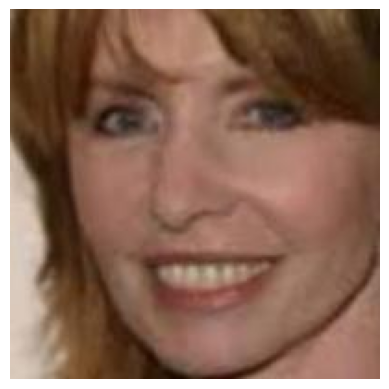

In [15]:
# Import the Image class from the Python Imaging Library (PIL) to work with images
from PIL import Image

# Open the first image in the 'image' column of the DataFrame
# Open the image at index [0][1] (adjust if necessary based on data structure we have)

img = Image.open(df['image'][0])

# remove the axis with numbers
# Remove the axis labels (numbers on x and y axes) for a cleaner display
plt.axis('off')

# Display the image using matplotlib's imshow function
# And i use semicolon at the end to remove matplotlib heading in output
plt.imshow(img);

- Display of the first image in the dataset

- You may resize the image to a uniform width and height for easier processing

- In this project we will resize all images to 128 x 128 due to limited resources

<Axes: xlabel='age', ylabel='Density'>

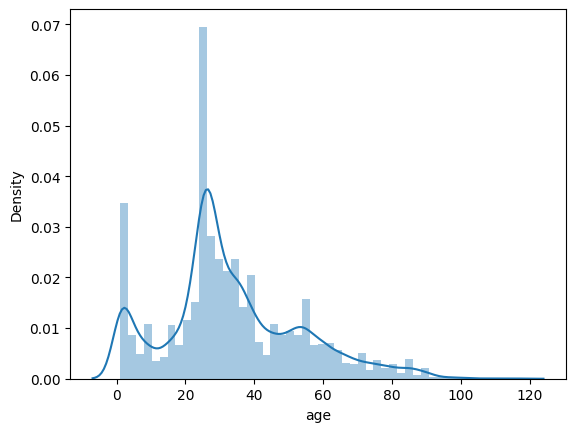

In [16]:
# Create a distribution plot (histogram with KDE by default) for the 'age' column to visualize the age distribution

sns.distplot(df['age'])

Distplot of the age attribute

The majority are in between ages 25 to 30 years old.

You may convert this distribution into a scaled format using Standard Scalar (or) Min Max Normalization

In [17]:
#sns.countplot(df['gender'])
# Create a count plot to visualize the frequency of the 'gender' column (counts of Male and Female)

# Visualization of the gender attribute and it's in uniform distribution

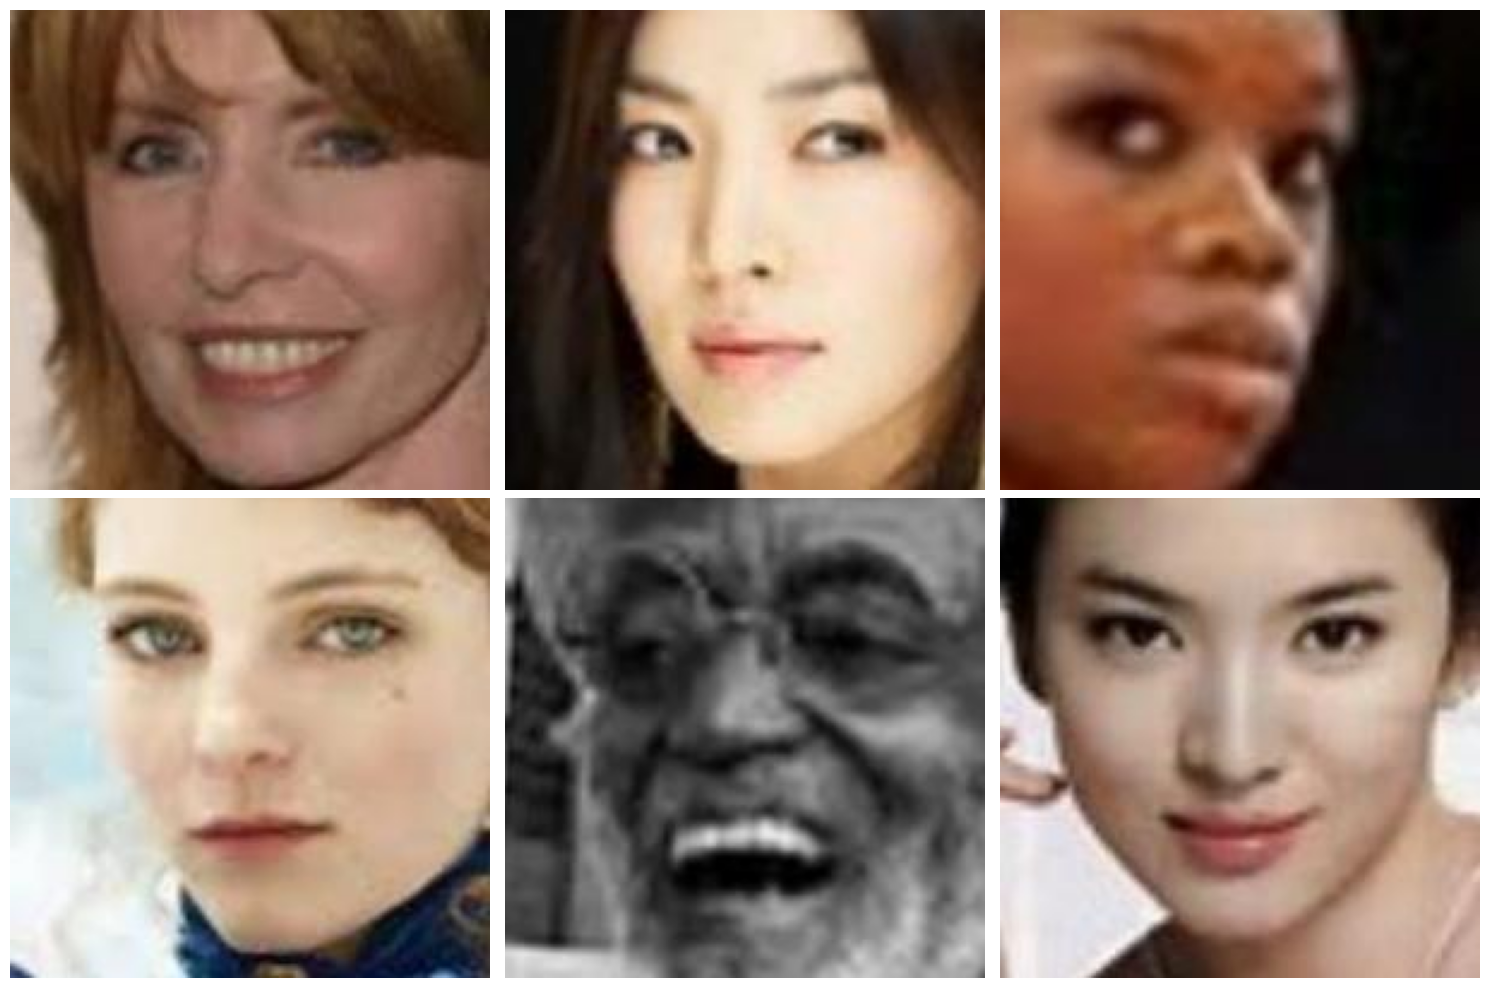

In [18]:
from PIL import Image  # Import the Image class from the Python Imaging Library (PIL) to handle images
import matplotlib.pyplot as plt  # Import matplotlib to visualize images

# Number of images to display
num_images = 6  # Specify how many images you want to open (6 in this case)

# Create a figure with subplots for displaying multiple images (2 rows, 3 columns layout)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
# 2 rows, 3 columns, adjust figsize for larger display

# Loop through the number of images to display
for i in range(num_images):
    # Open the ith image from the 'image' column in the DataFrame
    img = Image.open(df['image'][i])
    # Open the image at index 'i' in the 'image' column of the DataFrame

    # Determine the position of the current subplot (row and column)
    ax = axes[i // 3, i % 3]  # Place the image in the corresponding subplot (2 rows, 3 columns)

    # Remove the axis labels (numbers) for a cleaner display
    ax.axis('off')

    # Display the image in the subplot
    ax.imshow(img)

# Adjust layout to avoid overlapping of images or labels
plt.tight_layout()
plt.show()  # Display the images


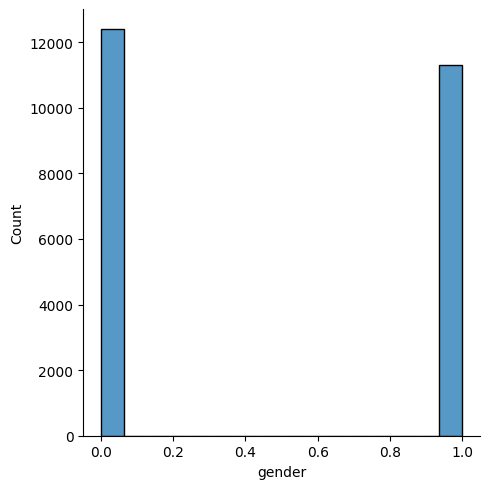

In [19]:
sns.displot(df['gender'])
# Create a distribution plot for the 'gender' column to visualize the frequency distribution of gender labels (0 for Male, 1 for Female)


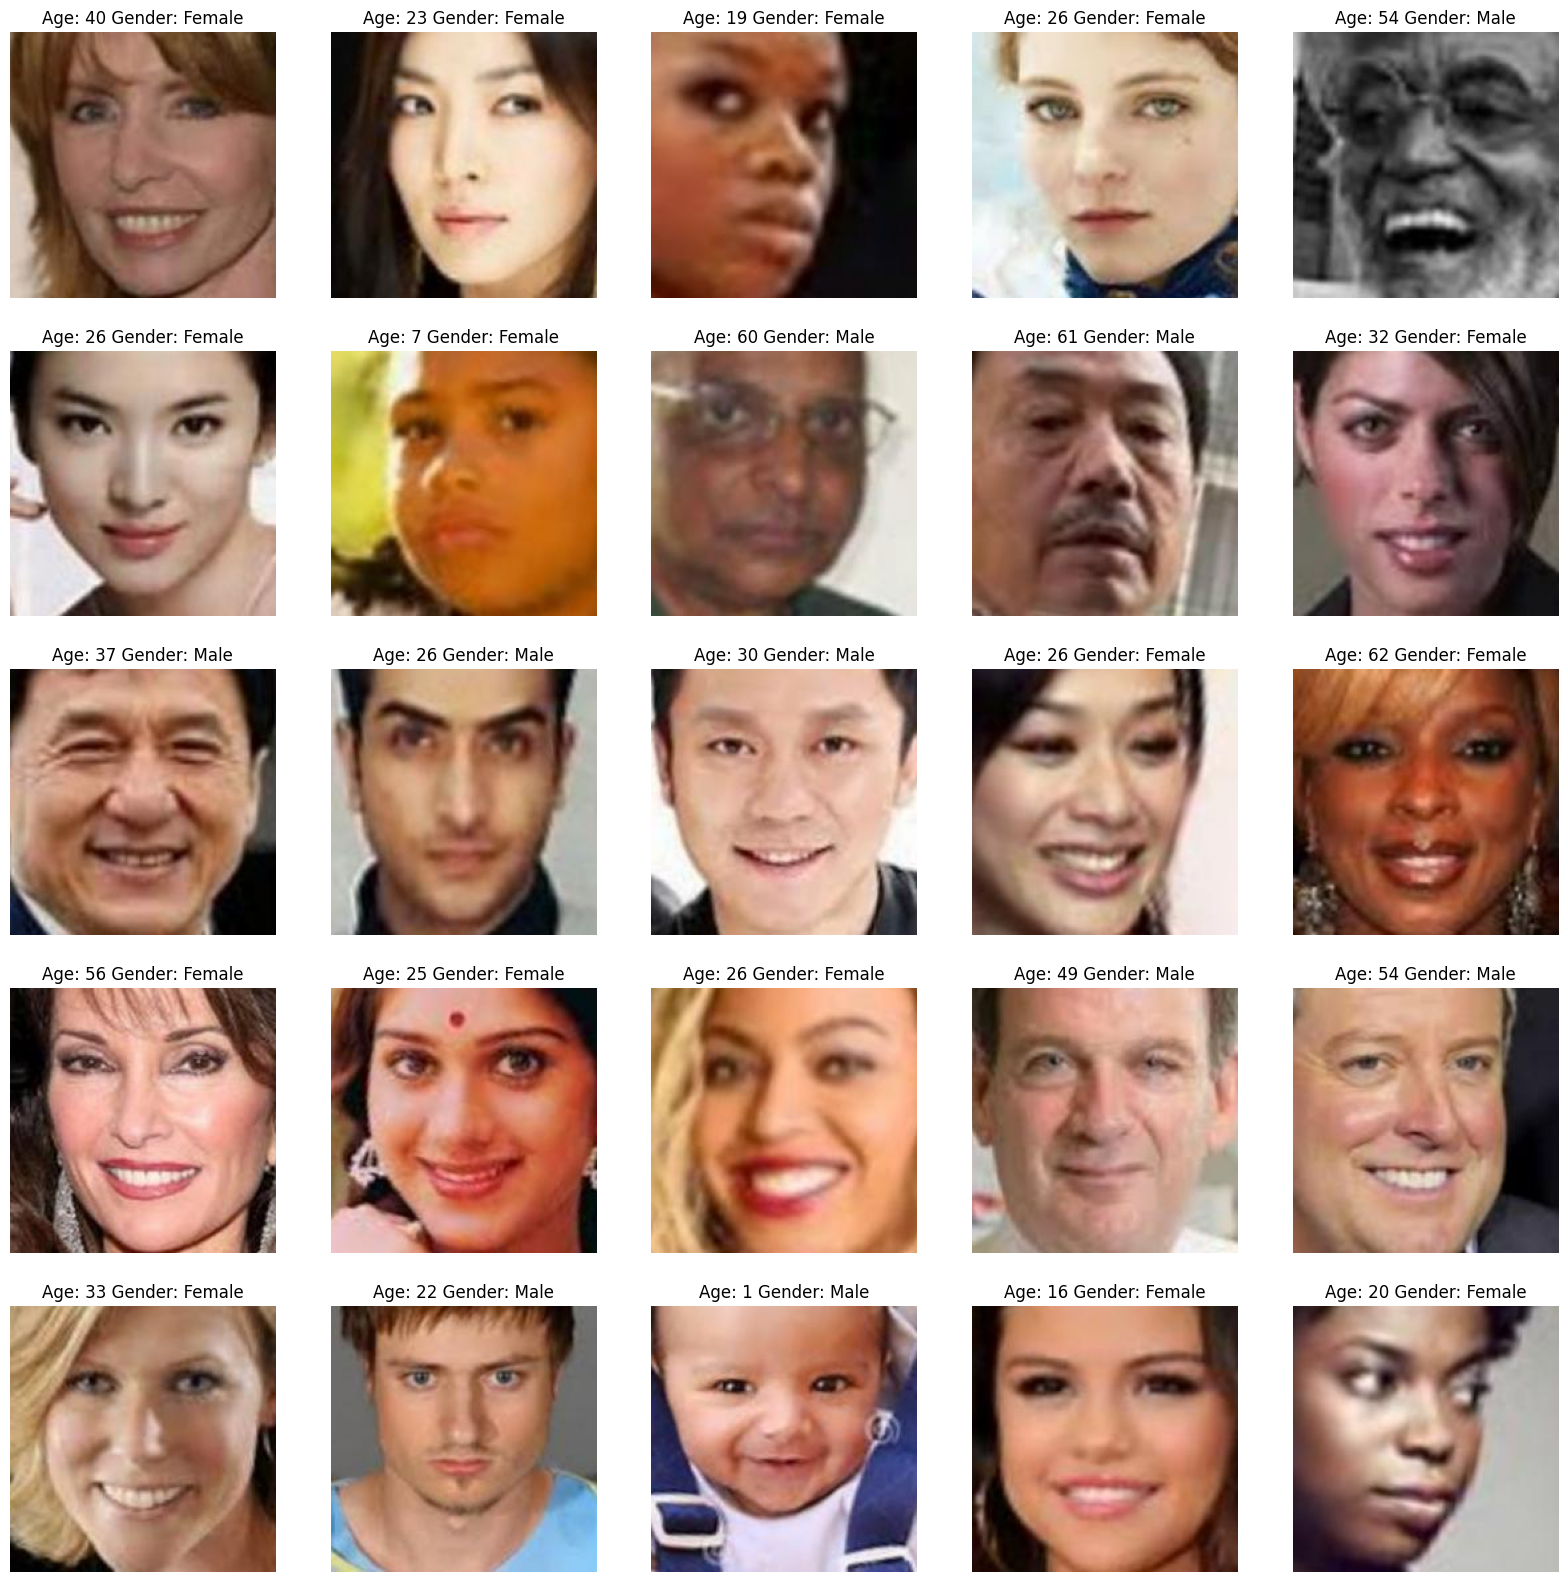

In [20]:
# to display grid of images

# Set the size of the figure for the plot
plt.figure(figsize=(20, 20))

# Select the first 25 rows from the DataFrame `df` to display images
# Show first 25 images
files = df.iloc[0:25]

# Iterate over the rows in the selected DataFrame
for index, file, age, gender in files.itertuples():

    # Create a subplot for each image in a 5x5 grid layout
    plt.subplot(5, 5, index+1)
    # Load the image from the specified file path

    img = load_img(file)
    # Convert the image to a NumPy array for plotting

    img = np.array(img)
    # Display the image on the subplot

    plt.imshow(img)

    # Set the title for the subplot with age and gender information
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    # Turn off the axis for a cleaner look

    plt.axis('off')

- Display of 25 random images with different genders and ages

- You may shuffle the data for different result

- Different saturation and qualities can be observed among the images

# Feature Extraction

In [21]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tqdm import tqdm
from PIL import Image


In [22]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        # Load the image in grayscale mode
        img = load_img(image, color_mode='grayscale')

        # Resize the image to 128x128 pixels using LANCZOS for high-quality downsampling
        img = img.resize((128, 128), Image.LANCZOS)

        # Convert the image to a NumPy array
        img = np.array(img)

        # Append the image array to the features list
        features.append(img)

    # Convert the list of features to a NumPy array
    features = np.array(features)

    # Reshape the array for the neural network input
    features = features.reshape(len(features), 128, 128, 1)  # For grayscale images
    return features



In [23]:
# !pip install --upgrade Pillow

Image reshaped is defined and in grayscale for quicker processing

# Alternate way

def extract_features(images):
    images = []  # Pass the images here as a list (you'll want to remove this empty list when actually passing image data)
    
    features = []  # Initialize an empty list to store features for each image

    for image in tqdm(images):  # Iterate over each image in the list with a progress bar (tqdm)
        # Getting each image path one by one
        # We are using grayscale here because it is more efficient for memory (single dimension)
        # RGB is 3D and it takes a lot of memory to load all images, which can crash the session.
        img = load_img(image, grayscale=True)  # Load the image in grayscale (single channel)
        
        # To avoid some distortion from the image while resizing, we can use Image.ANTIALIAS
        img = img.resize((128, 128), Image.ANTIALIAS)  # Resize the image to 128x128 using anti-aliasing to maintain quality
        
        img = np.array(img)  # Convert the image to a numpy array (everything we deal with is arrays in neural networks)
        features.append(img)  # Add the array to the list of features
    
    # Converting features to a numpy array, as neural networks only handle numpy arrays
    features = np.array(features)
    
    # Reshaping because neural networks expect specific input shapes:
    # - First dimension: the number of samples (images)
    # - Second and third dimensions: the image dimensions (width, height)
    # - Fourth dimension: the number of channels (for grayscale, it's 1, for RGB, it's 3)
    # Since we're using grayscale, we reshape the last dimension to 1.
    # We can skip this step if we are using RGB images.
    """
    # reshaping here becoz neural network will take particular input features
    # so, the first one represents the no of samples second one represnts the dimensions(width, height)
    # 3rd one represents it's rgb or grayscale(rgb - means giving it as 3 or bydefaultit will having this 3)
    # and for gray scale we have to  convert it to one(1)
    # we can also ignore this step if we are using rgb.
    """
    features = features.reshape(len(features), 128, 128, 1)

    return features


# Testing the feature extraction

In [24]:
X = extract_features(df['image'])
# Extract features (preprocessed image data) from the 'image' column of the DataFrame

100%|██████████| 23708/23708 [00:25<00:00, 941.66it/s]


In [25]:
X.shape
# Check the shape of the extracted features array (number of samples, width, height, channels)
# Features extracted from the image data

(23708, 128, 128, 1)

In [26]:
# normalize the images

# NORMALIZATION - Normalise the images
# becoz the pixel value is in the range value between o to 255 that's why i normalising it between 0 to 1.

X = X/255.0

# Normalize the pixel values of the images by dividing by 255 (scales values between 0 and 1)

# All images normalized from a range of 1 to 255 into 0 to 1

In [27]:
# CONVERTING Gender, Age to numpy array
# Convert the 'gender' column from the DataFrame into a numpy array (for use as labels)

y_gender = np.array(df['gender'])

# Convert the 'age' column from the DataFrame into a numpy array (for use as labels)
# Conversion of gender and age into a numpy array
y_age = np.array(df['age'])

In [28]:
input_shape = (128, 128, 1)

# doing configuration of input image

# Define the input shape for the model: 128x128 pixels, with 1 channel (grayscale)


# Configuration of input shape of the images into a fixed size and in grayscale

# MODEL CREATION

In [29]:
# This is convoulational neural network, here i will use image as input and we get 2 outputs's
# one is classifcation and second is for regression, so we will define two loss matrice here.

# This is a convolutional neural network. The input is an image, and we get 2 outputs:
# one for classification (gender) and one for regression (age), so we define two loss matrices here.

# Define the input shape for the model (128x128, 1 for grayscale)
inputs = Input((input_shape))

# convolutional layers

# This is my first layer in the convolutional network where I take input as 'inputs' and get 'conv_1' as output.
# First thing after Conv2D is the number of filters = 32
# First Conv2D layer with 32 filters and ReLU activation
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)

# Then 'conv_1' is passed as input into maxp_1 to get the output 'maxp_1' (MaxPooling)
# First MaxPooling layer with pool size 2x2
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)


conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1) # Second Conv2D layer with 64 filters
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2) # Second MaxPooling layer


conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2) # Third Conv2D layer with 128 filters
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3) # Third MaxPooling layer


conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3) # Fourth Conv2D layer with 256 filters
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4) # Fourth MaxPooling layer

# Flattening everything
# Flatten means that the convolutional layers store weights in matrix-like structures,
# so flatten converts this into a single-dimension vector, preparing it for dense layers.
flatten = Flatten() (maxp_4) # Flatten the output of the last MaxPooling layer

# Dense Layer/ Fully connected layers
# Passing the output of flatten into dense layers
dense_1 = Dense(256, activation='relu') (flatten)  # First Dense (fully connected) layer with 256 units
dense_2 = Dense(256, activation='relu') (flatten)  # Second Dense layer with 256 units

# Dropout Layers
# Dropout (0.3) adds some regularization to avoid overfitting. It passes the dense layer outputs into dropout layers.
dropout_1 = Dropout(0.3) (dense_1) # Dropout applied to the first dense layer
dropout_2 = Dropout(0.3) (dense_2) # Dropout applied to the second dense layer


# Output Layers
# Passing the dropout layers' output to the output layers
output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)  # Output for gender classification (binary)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2) # Output for age regression (continuous value)

# Defining the model with two outputs (gender and age)
model = Model(inputs=[inputs], outputs=[output_1, output_2])

# Compiling the model
# For classification, we use 'binary_crossentropy' loss and 'accuracy' as a metric -> gender
# For regression, we use 'mean absolute error (mae)' as the loss function and metric -> age

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])

- Dropout() - used to add regularization to the data, avoiding over fitting & dropping out a fraction of the data from the layers

- activation='sigmoid' - used for binary classification

- optimizer=’adam’ - automatically adjust the learning rate for the model over the no. of epochs

- loss='binary_crossentropy' - loss function for binary outputs



In [30]:
model.summary()  # Print a summary of the model architecture


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 126, 126, 32)   │            320 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 63, 63, 32)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 61, 61, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 30, 30, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 28, 28, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 14, 14, 128)    │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 12, 12, 256)    │        295,168 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 6, 6, 256)      │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 9216)           │              0 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │      2,359,552 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 256)            │      2,359,552 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 256)            │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gender_out (Dense)        │ (None, 1)              │            257 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ age_out (Dense)           │ (None, 1)              │            257 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 5,107,458 (19.48 MB)

 Trainable params: 5,107,458 (19.48 MB)

 Non-trainable params: 0 (0.00 B)

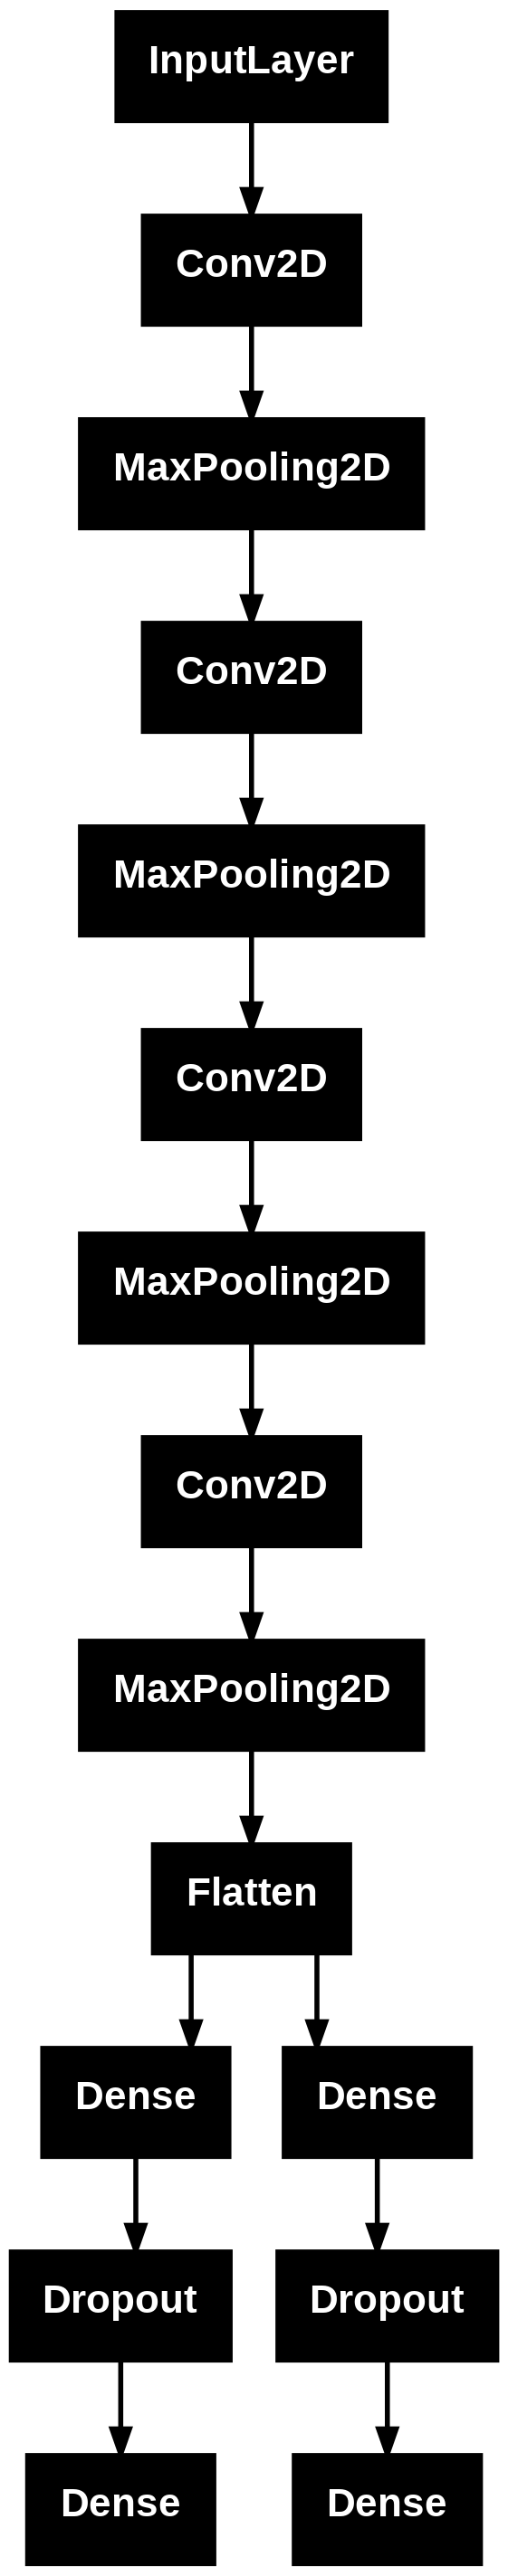

In [31]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

# Plot and visualize the model architecture


Model plot shows the image processing layers and split into 2 dense layers for classification and regression outputs

# Training the model

In [32]:
# Train the model
# 'x' is the input (image data), and 'y_gender', 'y_age' are the two target outputs (gender and age).
# Batch size is set to 32, with 30 epochs, and validation split is set to 20% of the data for validation during training.


history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - age_out_mae: 16.5364 - gender_out_accuracy: 0.5349 - loss: 17.2606 - val_age_out_mae: 12.6215 - val_gender_out_accuracy: 0.7391 - val_loss: 13.1480
Epoch 2/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - age_out_mae: 11.2689 - gender_out_accuracy: 0.7626 - loss: 11.7661 - val_age_out_mae: 9.2019 - val_gender_out_accuracy: 0.8049 - val_loss: 9.6269
Epoch 3/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - age_out_mae: 9.4149 - gender_out_accuracy: 0.8017 - loss: 9.8333 - val_age_out_mae: 8.2773 - val_gender_out_accuracy: 0.8376 - val_loss: 8.6346
Epoch 4/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - age_out_mae: 8.3946 - gender_out_accuracy: 0.8303 - loss: 8.7585 - val_age_out_mae: 7.5763 - val_gender_out_accuracy: 0.8439 - val_loss: 7.9216
Epoch 5/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - age_out_mae: 7.6860 - gender_out_accuracy: 0.8574 - loss: 8.0120 - val_age_out_mae: 7.0719 - val_gender_out_accuracy: 0.8555 - val_loss: 7

- Set the no. of epochs and batch size according to the hardware specifications

- Training accuracy and validation accuracy increases each iteration

- Training loss and validation loss decreases each iteration

# Plot the results

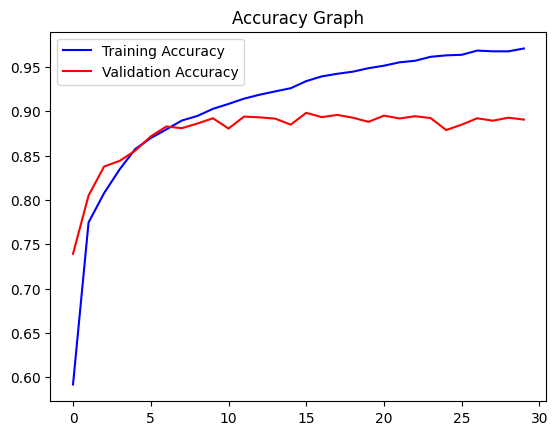

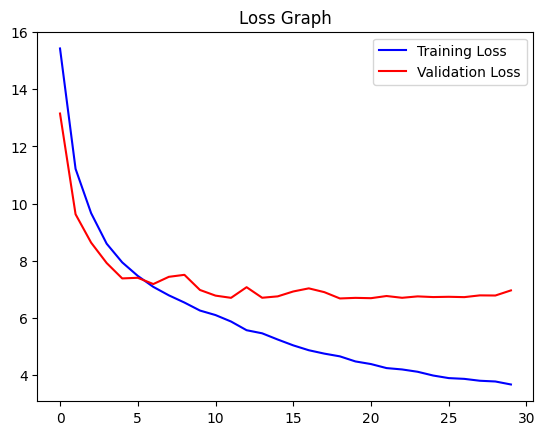

In [33]:
# ploting the results for gender
acc = history.history['gender_out_accuracy'] # Training accuracy
# Extract training accuracy for gender classification from the training history
val_acc = history.history['val_gender_out_accuracy']  # Validation Accuracy
# Extract validation accuracy for gender classification

epochs = range(len(acc))  # Create a range object representing the number of epochs (used for plotting)

# Plot the training and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accuracy')  # Plot training accuracy in blue
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')  # Plot validation accuracy in red
plt.title('Accuracy Graph')  # Set the title of the accuracy plot
plt.legend()  # Add a legend to differentiate between training and validation accuracy
plt.figure()  # Create a new figure for the next plot

loss = history.history['loss']  # Extract training loss from the history object
val_loss = history.history['val_loss']  # Extract validation loss from the history object

# Plot the training and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')  # Plot training loss in blue
plt.plot(epochs, val_loss, 'r', label='Validation Loss')  # Plot validation loss in red
plt.title('Loss Graph')  # Set the title of the loss plot
plt.legend()  # Add a legend to differentiate between training and validation loss

plt.show()  # Display the plots


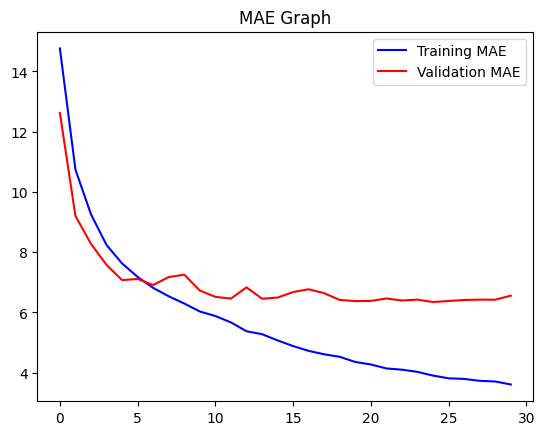

In [34]:
# ploting the results for age

loss = history.history['age_out_mae']  # Extract training Mean Absolute Error (MAE) for age regression from history
val_loss = history.history['val_age_out_mae']  # Extract validation MAE for age regression from history

epochs = range(len(loss))  # Create a range object representing the number of epochs (used for plotting)

# Plot the training and validation MAE
plt.plot(epochs, loss, 'b', label='Training MAE')  # Plot training MAE in blue
plt.plot(epochs, val_loss, 'r', label='Validation MAE')  # Plot validation MAE in red
plt.title('MAE Graph')  # Set the title of the MAE graph
plt.legend()  # Add a legend to differentiate between training and validation MAE
plt.show()  # Display the plot


# Prediction with Test Data

Original Gender: Male Original Age: 31
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
Predicted Gender: Male Predicted Age: 29


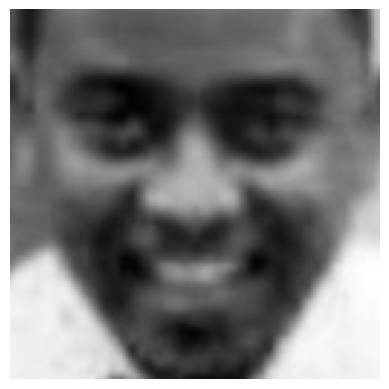

In [36]:
image_index = 100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# predict from model
# i am paasing one image that why i keep no of samples as 1
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
# After getting prediction i will have to separate the gender and age
# i am using round here becoz it will be here as 0 to 1 like a probability
# above anything 0.5 i will consider them as 1 and anything below 0.5 consider them as 0
# it give result in multi dimensional array format, in order to get the value from array
# i'm just using multiple indexes, so we have to go like 3 index.
# 0 - gender[first index]
pred_gender = gender_dict[round(pred[0][0][0])]
# again round of becoz age won't be in decimal
# 1 - age [first index]
# and these additional zeroes/ subscripts is just to get the value inside the from the array
pred_age = round(pred[1][0][0])

print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')

# to ignore the matplotlib add the semicolon with it.
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');


Original Gender: Male Original Age: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Predicted Gender: Female Predicted Age: 6


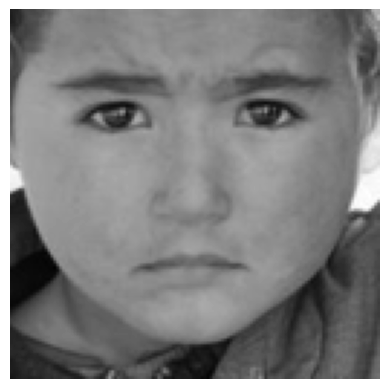

In [37]:
image_index = 3000  # Set the index of the image you want to inspect (e.g., 3000th image in the dataset)

# Print the original gender and age from the dataset using the labels
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# Predict from the model
# Reshape the input image (128x128, 1 channel) for the model, and make predictions
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))

# Get the predicted gender using rounding to convert the model's output to 0 (Male) or 1 (Female)
pred_gender = gender_dict[round(pred[0][0][0])]

# Get the predicted age by rounding the model's regression output for age
pred_age = round(pred[1][0][0])

# Print the predicted gender and age
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)

# Plot the original image
plt.axis('off')  # Turn off the axes for a cleaner display of the image
plt.imshow(X[image_index].reshape(128, 128), cmap='gray')  # Display the image in grayscale


Original Gender: Male Original Age: 36
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted Gender: Male Predicted Age: 32


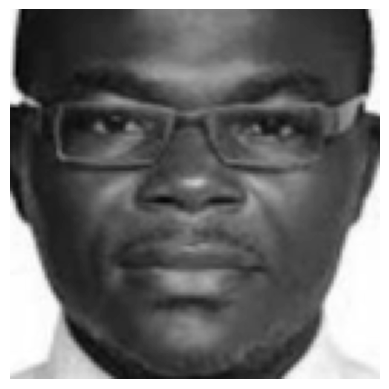

In [38]:
image_index = 10000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 39
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Gender: Male Predicted Age: 31


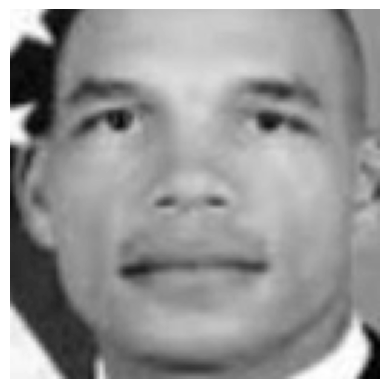

In [39]:
image_index = 8000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 23
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Gender: Male Predicted Age: 24


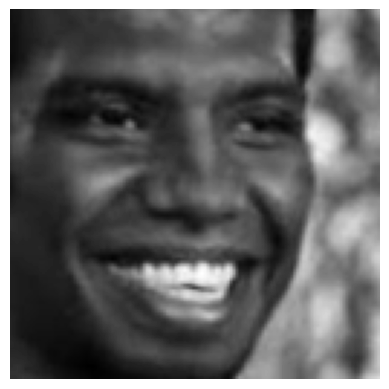

In [40]:
image_index = 7425
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

# Conclusion/Final Thoughts
- Training the model by increasing the no. of epochs can give better and more accurate results.
- Processing large amount of data can take a lot of time and system resources.
- The no. of layers of the model can be increased if you want to process large dataset